In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the milk production dataset
df = pd.read_csv('/content/drive/MyDrive/College work ipynb/milk_production(3).csv')


In [12]:
# Explain the distribution of data
print("Data Distribution:")
print(df.describe())

Data Distribution:
       pounds_per_cow
count      168.000000
mean       754.708333
std        102.204524
min        553.000000
25%        677.750000
50%        761.000000
75%        824.500000
max        969.000000


# Data Distribution:
- Our dataset has 168 values, where minimum value is 553 pounds per cow in year 1962, and maximum milk production is 969 in the year 1974.

- Above line graph shows that milk production follows a seasionality, in winter the production is low and there is a spike in production in the summer.

- Also, it is evident that with every increasing year there is a rise in pounds per cows. For the year 1971, the average pounds per cow in winter is more than average pounds per cow in the summer of 1962.

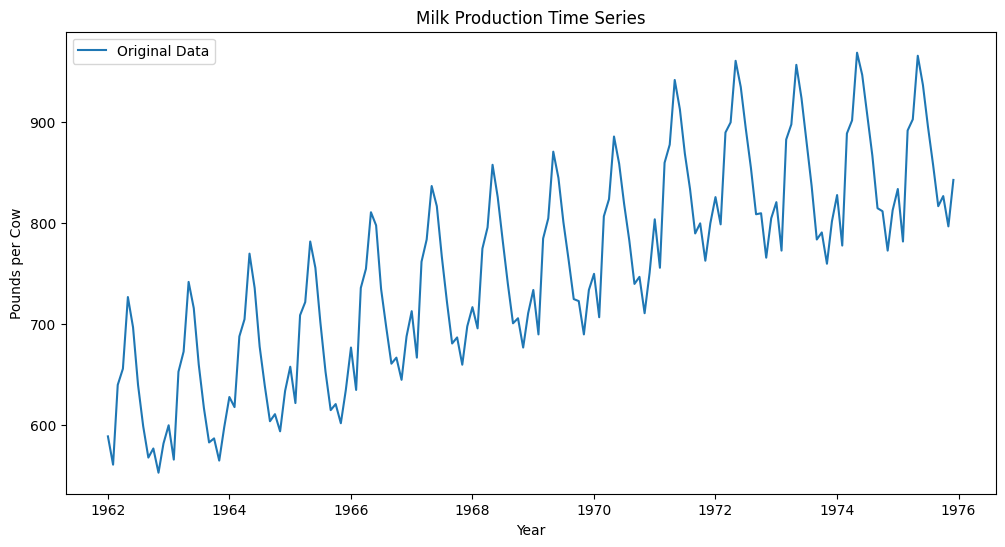

In [13]:
# Set the 'date' column as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['pounds_per_cow'], label='Original Data')
plt.title('Milk Production Time Series')
plt.xlabel('Year')
plt.ylabel('Pounds per Cow')
plt.legend()
plt.show()


# Splitting data for training and testing:
- The dataset is split into training and testing sets. The training set consists of 80% of the data, and the testing set comprises the remaining 20%.

# Preparing the data:
- The data is normalized using Min-Max scaling, which transforms the values of the 'pounds_per_cow' feature to a range between 0 and 1. This is achieved using the MinMaxScaler from scikit-learn.

- A function named create_sequences is defined to create sequences and corresponding labels for the LSTM model. It takes the normalized 'pounds_per_cow' values and a specified sequence length as input and returns sequences and labels.

- The chosen sequence length for creating input sequences for the LSTM model is set to 12 (As we havw 12 monthsin a year). This means each input sequence will consist of 12 consecutive values of the normalized 'pounds_per_cow' feature.

- The create_sequences function is then applied to both the training and testing datasets to create input sequences and labels. The X_train and X_test sequences are reshaped to be suitable for input into an LSTM model by adding an additional dimension (1) representing the univariate nature of the time series data.

In [4]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df['pounds_per_cow_scaled'] = scaler.fit_transform(df[['pounds_per_cow']])

# Split data for train and test
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences, labels = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 12
X_train, y_train = create_sequences(train['pounds_per_cow_scaled'].values, sequence_length)
X_test, y_test = create_sequences(test['pounds_per_cow_scaled'].values, sequence_length)

# Reshape input for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# LSTM Model explaination:
- The LSTM Model is build using Sequential model added with LSTM layer and one dense layer.

- The model is compiled using the mean squared error as the loss function and the specified optimizer (default is 'adam').

- A nested loop iterates over different numbers of epochs (100, 50, 80) and optimizers ('adam', 'rmsprop', 'sgd'). For each combination, a new LSTM model is created and trained (using create_lstm_model function) on the training data (X_train, y_train) with the specified number of epochs and optimizer.

- After training, the model is used to make predictions on both the training (train_predictions) and testing (test_predictions) datasets. The actual data, along with the predictions, is visualized using matplotlib. The visualizations include separate plots for training and testing predictions, as well as the original data.

- The Mean Squared Error (MSE) is calculated to evaluate the performance of the model on both the training and testing datasets. The MSE is computed by comparing the inverse-transformed (transforming the scaled data back to normal) predictions with the original 'pounds_per_cow' values.

1/1 [==============================] - 0s 24ms/step


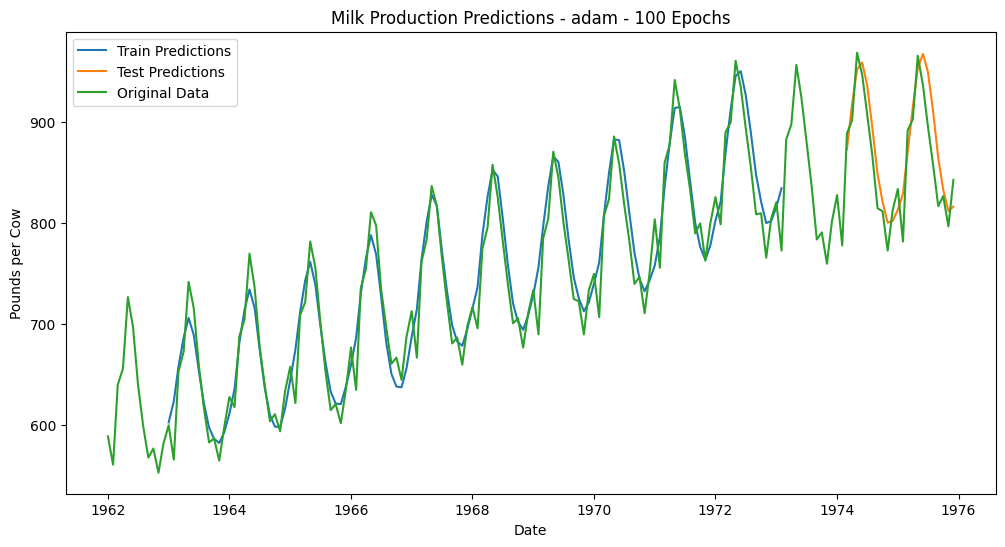

Metrics for adam - 100 Epochs:
Train MSE: 15975.15100392023
Test MSE: 6750.996056612196
Train MAE: 102.27401961398618
Test MAE: 66.89727278780346
1/1 [==============================] - 0s 23ms/step


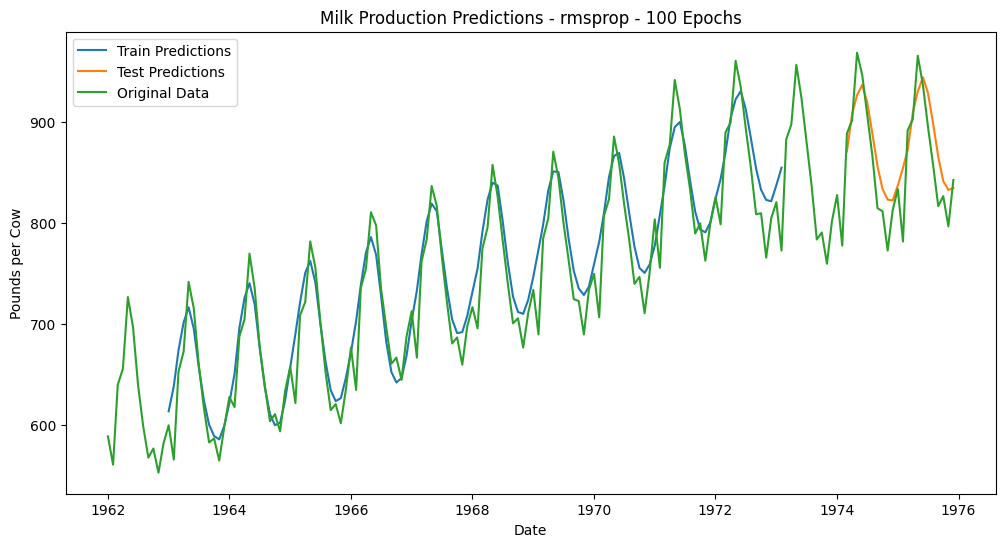

Metrics for rmsprop - 100 Epochs:
Train MSE: 15309.274675512419
Test MSE: 5134.760467968835
Train MAE: 100.38125457804679
Test MAE: 59.17202456135395
1/1 [==============================] - 0s 24ms/step


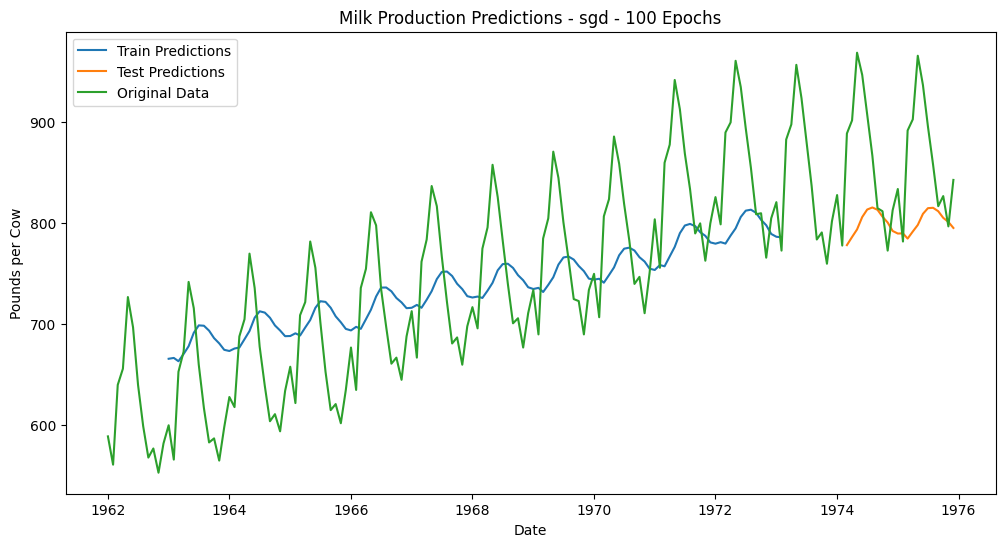

Metrics for sgd - 100 Epochs:
Train MSE: 9376.595025453897
Test MSE: 7667.397569110263
Train MAE: 78.89697796258514
Test MAE: 69.96646193827479
1/1 [==============================] - 0s 32ms/step


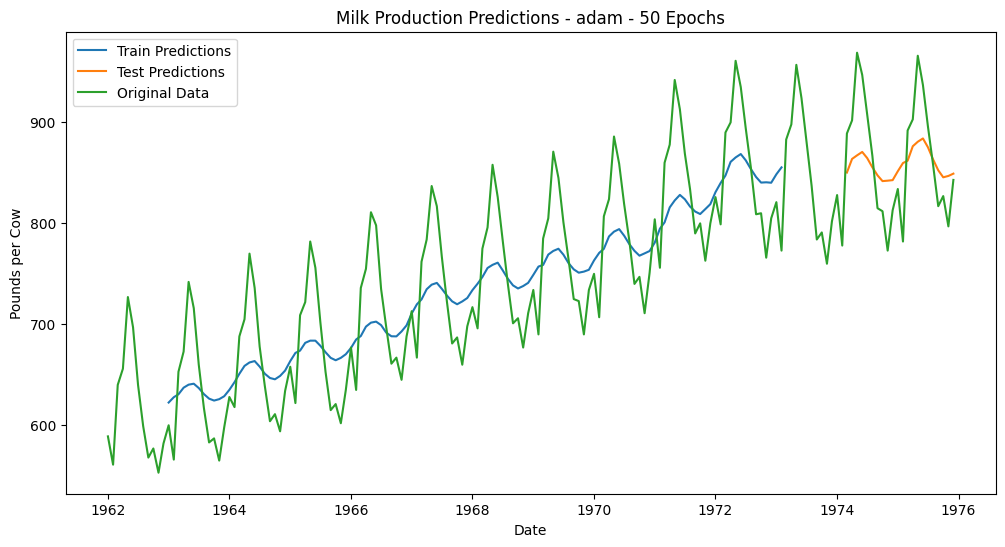

Metrics for adam - 50 Epochs:
Train MSE: 12687.195540794508
Test MSE: 3530.472820822565
Train MAE: 91.37393005584332
Test MAE: 50.91558081256456
1/1 [==============================] - 0s 26ms/step


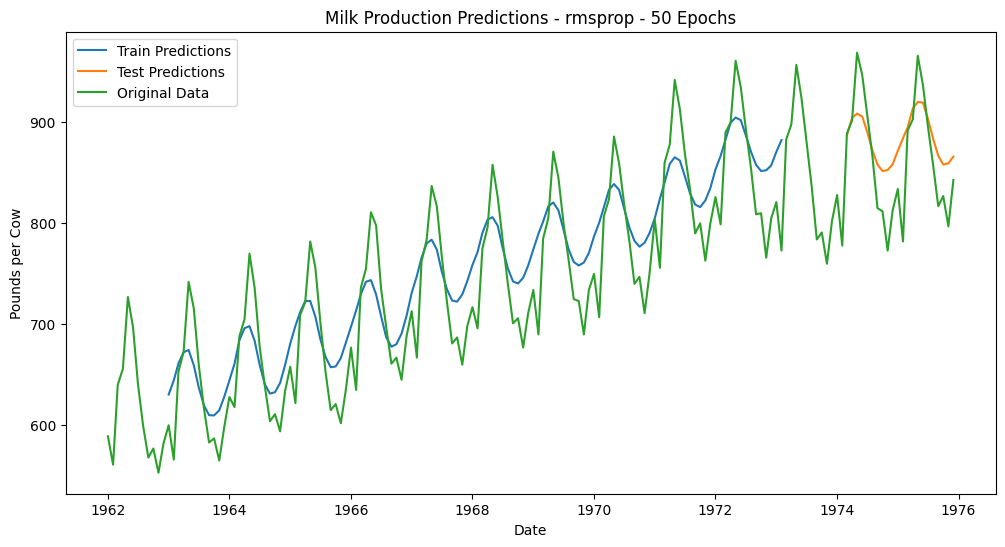

Metrics for rmsprop - 50 Epochs:
Train MSE: 14057.111946539384
Test MSE: 4131.492950380218
Train MAE: 96.27740252975877
Test MAE: 54.29423712107761
1/1 [==============================] - 0s 24ms/step


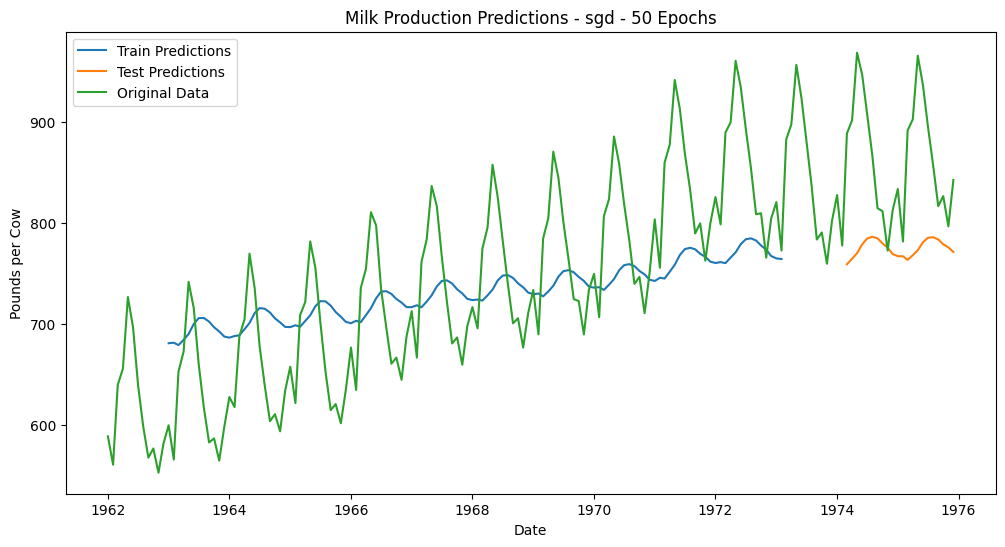

Metrics for sgd - 50 Epochs:
Train MSE: 8690.361300675937
Test MSE: 11533.71979474424
Train MAE: 76.1738831648997
Test MAE: 90.79299094460227
1/1 [==============================] - 0s 25ms/step


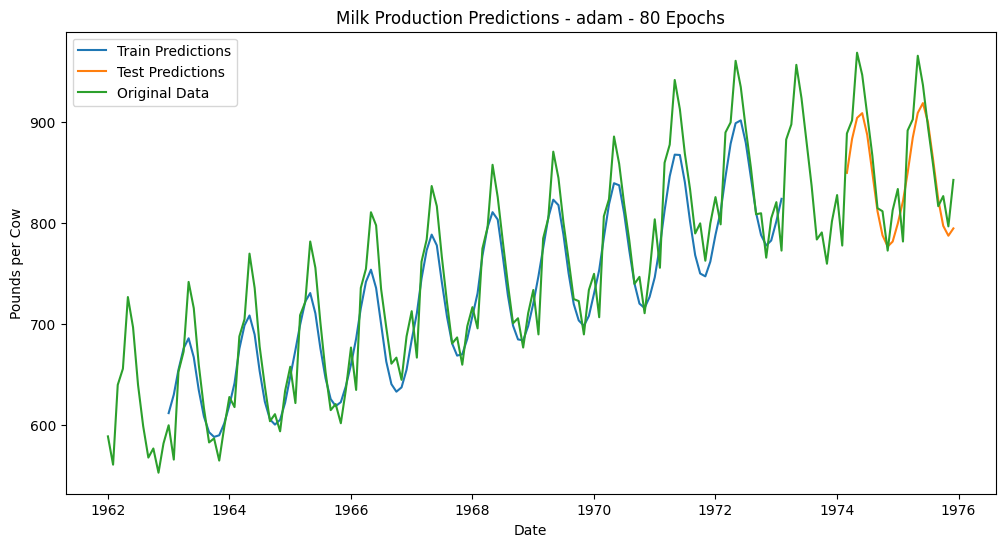

Metrics for adam - 80 Epochs:
Train MSE: 13998.094891967561
Test MSE: 5997.495787034289
Train MAE: 95.66410170290874
Test MAE: 62.82037832717265
1/1 [==============================] - 0s 46ms/step


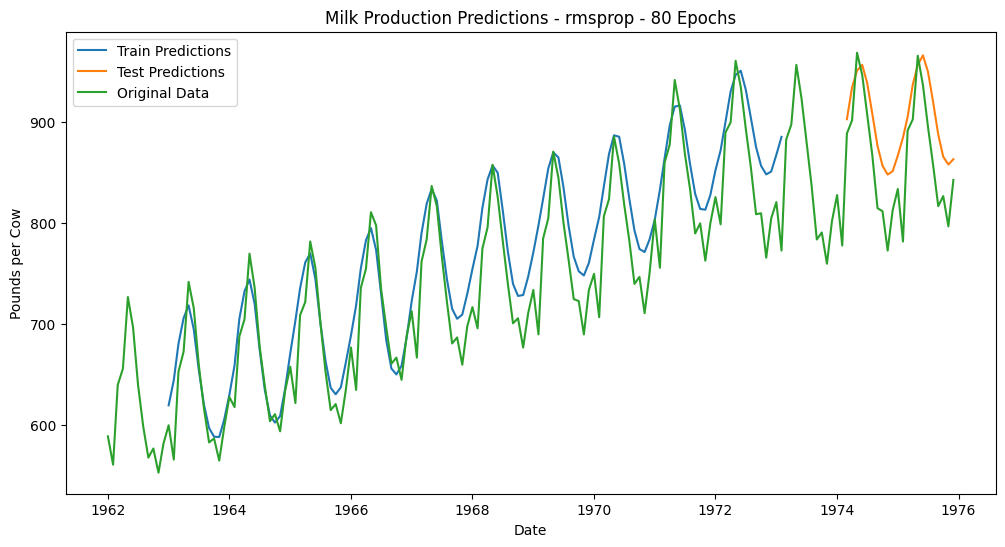

Metrics for rmsprop - 80 Epochs:
Train MSE: 16939.140252265894
Test MSE: 6313.248399896947
Train MAE: 105.83020665805144
Test MAE: 65.70688597623968
1/1 [==============================] - 0s 24ms/step


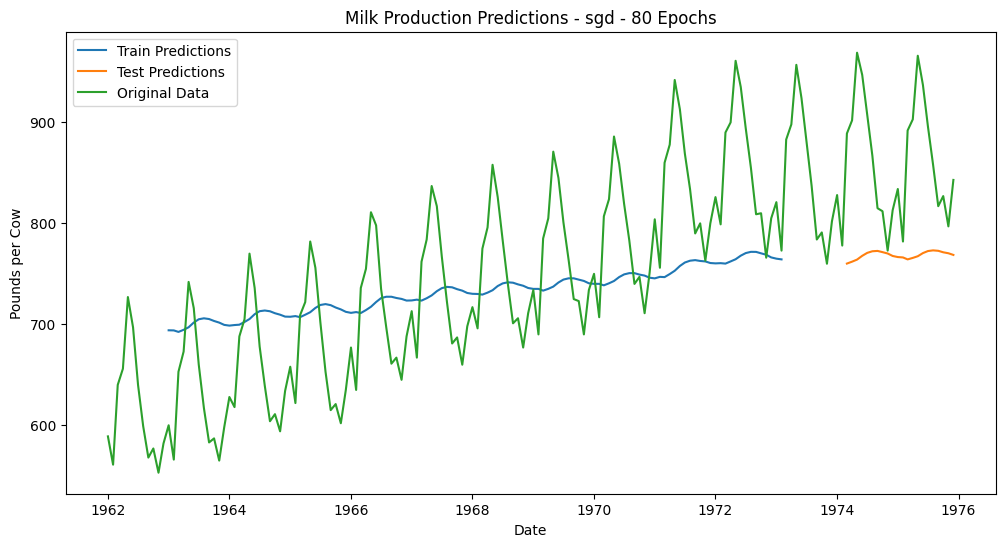

Metrics for sgd - 80 Epochs:
Train MSE: 8431.663335352157
Test MSE: 12777.577235958777
Train MAE: 75.1583873048581
Test MAE: 97.17510759337874


In [14]:
# LSTM model creation
def create_lstm_model(optimizer='adam'):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Train the model with different epochs and optimizers
epochs_list = [100, 50, 80]
optimizers_list = ['adam', 'rmsprop', 'sgd']

for epochs in epochs_list:
    for optimizer in optimizers_list:
        model = create_lstm_model(optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.1, verbose=0)

        # Find predictions for train and test
        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        # Visualize actual data and predictions
        plt.figure(figsize=(12, 6))
        plt.plot(df.index[sequence_length:train_size], scaler.inverse_transform(train_predictions), label='Train Predictions')
        plt.plot(df.index[train_size + sequence_length:], scaler.inverse_transform(test_predictions), label='Test Predictions')
        plt.plot(df.index, df['pounds_per_cow'], label='Original Data')
        plt.title(f'Milk Production Predictions - {optimizer} - {epochs} Epochs')
        plt.xlabel('Date')
        plt.ylabel('Pounds per Cow')
        plt.legend()
        plt.show()

        # Evaluate performance with a metric (e.g., Mean Squared Error)
        train_mse = np.mean(np.square(scaler.inverse_transform(train_predictions) - train['pounds_per_cow'].values[sequence_length:]))
        test_mse = np.mean(np.square(scaler.inverse_transform(test_predictions) - test['pounds_per_cow'].values[sequence_length:]))
        train_mae = np.mean(np.abs(scaler.inverse_transform(train_predictions) - train['pounds_per_cow'].values[sequence_length:]))
        test_mae = np.mean(np.abs(scaler.inverse_transform(test_predictions) - test['pounds_per_cow'].values[sequence_length:]))

        print(f'Metrics for {optimizer} - {epochs} Epochs:')
        print(f'Train MSE: {train_mse}')
        print(f'Test MSE: {test_mse}')
        print(f'Train MAE: {train_mae}')
        print(f'Test MAE: {test_mae}')

# Comparing the performance:
- Based on the Train MAE/MSE and Testing MAE/MSE we can comclude that The combination of adam with 50 Epochs stands out as it has the lowest Test MSE and Test MAE among the options, suggesting better performance on the test set.

- Also, we can see overfitting in models with higher epochs. As the model performs better on training data and poorly on testing data, the line graph shows the model trying to overfit the training data.